### Time Series – Part1 – Data Prep
1.	Import libraries & set directory paths
2.	Import dataset and check dimensions and columns.
    -	Import: stone_signs_portal_v1.1 - 29,255.csv
3.	Filter to retain Sales & Letting data only.
4.	Create subset for time series data: request_datetime & quantity
5.	Converting date strings to datatime
6.	Extracting date only from datatime & convert from string to date
7.	Calculate number of requests per day
8.	Convert to Time Series
9.	Address missing dates from Time Series:
    -	Create list of missing dates.
    -	Convert to dataframe.
    -	Combine original Time Series with missing dates using append( ) function.
10.	Display Time series plot, and export to file.
11.	Time Series Decomposition & Observations
12.	Filter data to exclude 1st Pandemic lockdown in preparation of Stationising the data.
    -	1st June 2020 to 31st Aug 2021
    -	Export to: time_series_requests_per_day_from_Jun2020.csv

### import libraries

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# The use of .api also import the public access versin of statsmodels
# statsmodels handles statistical models
import statsmodels.api as sm

# Import warnings & disable deprecation warnings that could indicate, for instance, a suspended library or feature. 
    # These are more relevant to developers and very seldom to analysts.
import warnings
warnings.filterwarnings("ignore")

import quandl

# 'fivethirtyeight' is a styling option for how your plots will appear.
    # More examples:
    # https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
    # https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html
plt.style.use('fivethirtyeight')

### set directory paths

In [2]:
dataset = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\02 Data'
dataset

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\02 Data'

In [3]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\04 Analysis'

## Import Portal Data
    an early version containing 29,255 records

In [4]:
df_portal = pd.read_csv(os.path.join(dataset,'stone_signs_portal_v1.1 - 29,255.csv'))
df_portal.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,quantity,additional_info,request_status,payment_status,net_charge,vat,gross_charge,invoice_datetime,paid_datetime,payment_duration_days
0,332,02/01/2020 09:18,02/01/2020 15:55,0.28,6.6,Hyman Hill,HYH,HymanHill @Shoreham-by-Sea,530,Sales,...,1,two boards please as on corner plot with one b...,Completed,Paid,3.85,0.77,4.62,01/02/2020 15:46,26/02/2020 19:13,25.1
1,334,02/01/2020 10:32,02/01/2020 14:47,0.18,4.3,Michael Jones,MCJ,MichaelJones @LancingSales(&Bacon),502,Sales,...,1,NaN,Completed,Paid,3.80,0.76,4.56,01/02/2020 17:02,29/02/2020 10:27,27.7
2,335,02/01/2020 10:40,04/01/2020 12:20,2.07,49.7,zz Symonds & Reading,ZZ4,zz Symonds&Reading @Ferring,350,Sales,...,1,NaN,Completed,Paid,3.80,0.76,4.56,01/02/2020 17:13,26/02/2020 19:12,25.1
3,336,02/01/2020 10:58,02/01/2020 14:42,0.16,3.7,Michael Jones,MCJ,MichaelJones @LancingSales(&Bacon),502,Sales,...,1,NaN,Completed,Paid,3.80,0.76,4.56,01/02/2020 17:02,29/02/2020 10:27,27.7
4,337,02/01/2020 11:10,03/01/2020 16:10,1.21,29.0,Rowland Gorringe,ROW,RowlandGorringe @Seaford,950,Sales,...,1,NaN,Completed,Paid,3.80,0.76,4.56,01/02/2020 17:06,29/02/2020 10:27,27.7


### check dimensions & data types

In [5]:
df_portal.shape

(29255, 30)

In [6]:
df_portal.dtypes

request_id                    int64
request_datetime             object
completed_datetime           object
completed_duration_days     float64
completed_duration_hours    float64
agent_name                   object
agent_code                   object
branch_name                  object
branch_code                   int64
sign_category                object
sign_action                  object
board_type                   object
sign_type                    object
address_1                    object
address_2                    object
address_3                    object
town                         object
postcode                     object
latitude                    float64
longitude                   float64
quantity                      int64
additional_info              object
request_status               object
payment_status               object
net_charge                  float64
vat                         float64
gross_charge                float64
invoice_datetime            

### extract Sales and Letting requests only
    as these request are made by customer, 
    and other ad hoc items are added to the system for invoicing purposes.

In [7]:
df_saleslet = df_portal.loc[(df_portal['sign_category']=='Sales') | (df_portal['sign_category']=='Letting')]
df_saleslet.shape

(27784, 30)

### check value counts

In [8]:
df_saleslet['sign_category'].value_counts()

Sales      21990
Letting     5794
Name: sign_category, dtype: int64

### create subset to include columns 'requested_datetime' & 'quantity' 

In [9]:
df_request = df_saleslet[['request_datetime','quantity']]
df_request.head()

,request_datetime,quantity
0,02/01/2020 09:18,1
1,02/01/2020 10:32,1
2,02/01/2020 10:40,1
3,02/01/2020 10:58,1
4,02/01/2020 11:10,1


In [10]:
df_request.dtypes

request_datetime    object
quantity             int64
dtype: object

### check for nulls

In [11]:
df_request.isnull().sum()

request_datetime    0
quantity            0
dtype: int64

### convert request_datetime from string to date
    define format to ensure UK format order

In [12]:
df_request['request_datetime'] = pd.to_datetime(df_request['request_datetime'],format='%d/%m/%Y %H:%M')
df_request.dtypes

request_datetime    datetime64[ns]
quantity                     int64
dtype: object

### check min and max value for request_datetime to ensure conversion correct
    dateaset runs from Jan2020 to Aug2021

In [13]:
df_request['request_datetime'].min()

Timestamp('2020-01-02 09:18:00')

In [14]:
df_request['request_datetime'].max()

Timestamp('2021-08-31 15:29:00')

### extract date portion only from datetime

In [15]:
df_request['request_date'] = df_request['request_datetime'].dt.date
df_request

,request_datetime,quantity,request_date
0,2020-01-02 09:18:00,1,2020-01-02
1,2020-01-02 10:32:00,1,2020-01-02
2,2020-01-02 10:40:00,1,2020-01-02
3,2020-01-02 10:58:00,1,2020-01-02
4,2020-01-02 11:10:00,1,2020-01-02
...,...,...,...
29250,2021-08-31 14:54:00,1,2021-08-31
29251,2021-08-31 15:08:00,1,2021-08-31
29252,2021-08-31 15:26:00,1,2021-08-31
29253,2021-08-31 15:27:00,1,2021-08-31


### check data types

In [16]:
df_request.dtypes

request_datetime    datetime64[ns]
quantity                     int64
request_date                object
dtype: object

### convert request_date column to date format

In [17]:
df_request['request_date'] = pd.to_datetime(df_request['request_date'], format='%Y-%m-%d')

In [18]:
df_request.dtypes

request_datetime    datetime64[ns]
quantity                     int64
request_date        datetime64[ns]
dtype: object

### check min and max values for request_date
    to ensure conversion carried out correctly

In [19]:
df_request['request_date'].min()

Timestamp('2020-01-02 00:00:00')

In [20]:
df_request['request_date'].max()

Timestamp('2021-08-31 00:00:00')

### drop request_datetime column

In [21]:
df_request = df_request.drop(columns=['request_datetime'])
df_request.head()

,quantity,request_date
0,1,2020-01-02
1,1,2020-01-02
2,1,2020-01-02
3,1,2020-01-02
4,1,2020-01-02


### calculate number of requests per day

In [22]:
df_request['requests_per_day'] = df_request.groupby(df_request['request_date']) ['quantity'].transform(np.size)
df_request.head()

,quantity,request_date,requests_per_day
0,1,2020-01-02,48
1,1,2020-01-02,48
2,1,2020-01-02,48
3,1,2020-01-02,48
4,1,2020-01-02,48


### drop quantity column

In [23]:
df_request = df_request.drop(columns=['quantity'])
df_request.head()

,request_date,requests_per_day
0,2020-01-02,48
1,2020-01-02,48
2,2020-01-02,48
3,2020-01-02,48
4,2020-01-02,48


In [24]:
df_request.shape

(27784, 2)

In [25]:
df_request.dtypes

request_date        datetime64[ns]
requests_per_day             int64
dtype: object

### drop duplicates

In [26]:
df_request = df_request.drop_duplicates()
df_request.shape

(541, 2)

### reset_index

In [27]:
df_request = df_request.reset_index(drop=True)
df_request

,request_date,requests_per_day
0,2020-01-02,48
1,2020-01-03,102
2,2020-01-04,19
3,2020-01-05,9
4,2020-01-06,78
...,...,...
536,2021-08-25,59
537,2021-08-26,51
538,2021-08-27,33
539,2021-08-28,9


### convert to time series by setting the request_date as the index

In [28]:
df_request = df_request.set_index(['request_date'])
df_request.head()

,requests_per_day
request_date,
2020-01-02,48
2020-01-03,102
2020-01-04,19
2020-01-05,9
2020-01-06,78


In [29]:
df_request.isnull().sum()

requests_per_day    0
dtype: int64

### check for missing dates in time series and add

In [30]:
missing_dates = pd.date_range('2020-01-02', '2021-08-31').difference(df_request.index)
missing_dates

DatetimeIndex(['2020-01-12', '2020-01-19', '2020-01-26', '2020-02-23',
               '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22',
               '2020-03-29', '2020-04-04', '2020-04-05', '2020-04-12',
               '2020-04-13', '2020-04-19', '2020-04-26', '2020-05-03',
               '2020-05-08', '2020-05-10', '2020-05-17', '2020-05-24',
               '2020-06-07', '2020-06-14', '2020-06-21', '2020-07-05',
               '2020-07-19', '2020-07-26', '2020-08-02', '2020-08-09',
               '2020-08-31', '2020-10-11', '2020-10-18', '2020-10-25',
               '2020-11-01', '2020-11-15', '2020-11-22', '2020-12-06',
               '2020-12-13', '2020-12-20', '2020-12-25', '2020-12-26',
               '2020-12-27', '2021-01-01', '2021-01-10', '2021-01-24',
               '2021-02-07', '2021-02-14', '2021-02-21', '2021-02-28',
               '2021-03-07', '2021-03-21', '2021-04-04', '2021-04-25',
               '2021-05-03', '2021-05-09', '2021-05-23', '2021-05-30',
      

### add missing dates to time series dataframe
    1) Create time series of missing dates
    2) Combine with original time series using append() function
    3) sort_index

In [31]:
df_missing_dates = df_request.reindex(missing_dates, fill_value=0)
df_missing_dates.shape

(67, 1)

### combine both time series to give complete dates

In [32]:
df_request = df_request.append(df_missing_dates)
df_request.shape

(608, 1)

### sort index

In [33]:
df_request = df_request.sort_index()
df_request

,requests_per_day
2020-01-02,48
2020-01-03,102
2020-01-04,19
2020-01-05,9
2020-01-06,78
...,...
2021-08-27,33
2021-08-28,9
2021-08-29,0
2021-08-30,0


## Display as time series plot

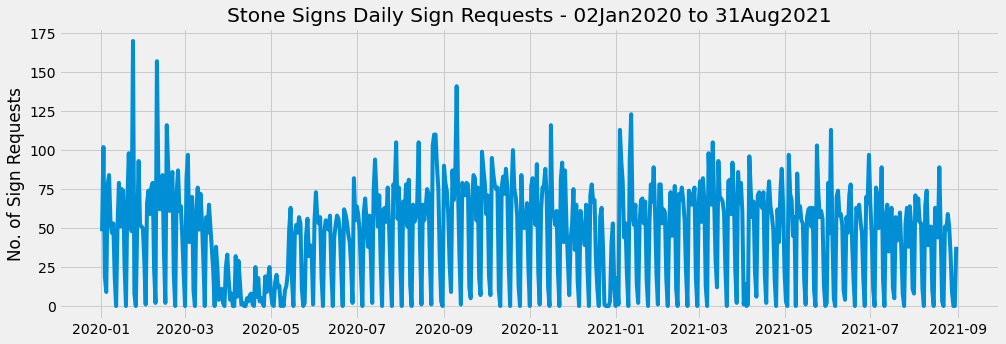

In [34]:
plt.figure(figsize=(15,5))
plt.title('Stone Signs Daily Sign Requests - 02Jan2020 to 31Aug2021')
plt.ylabel('No. of Sign Requests')
plt.plot(df_request)

plt.savefig(os.path.join(vizpath,'!Time Series - Stone Signs Daily Sign Requests - 02Jan2020 to 31Aug2021.png'))

## Time Series Decompostion
    1) Define a fixed size for all special charts using rcParams.
    2) Carry out the decomposition.
    3) Display as plot.

In [28]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

In [29]:
decomposition = sm.tsa.seasonal_decompose(df_request, model='additive') 

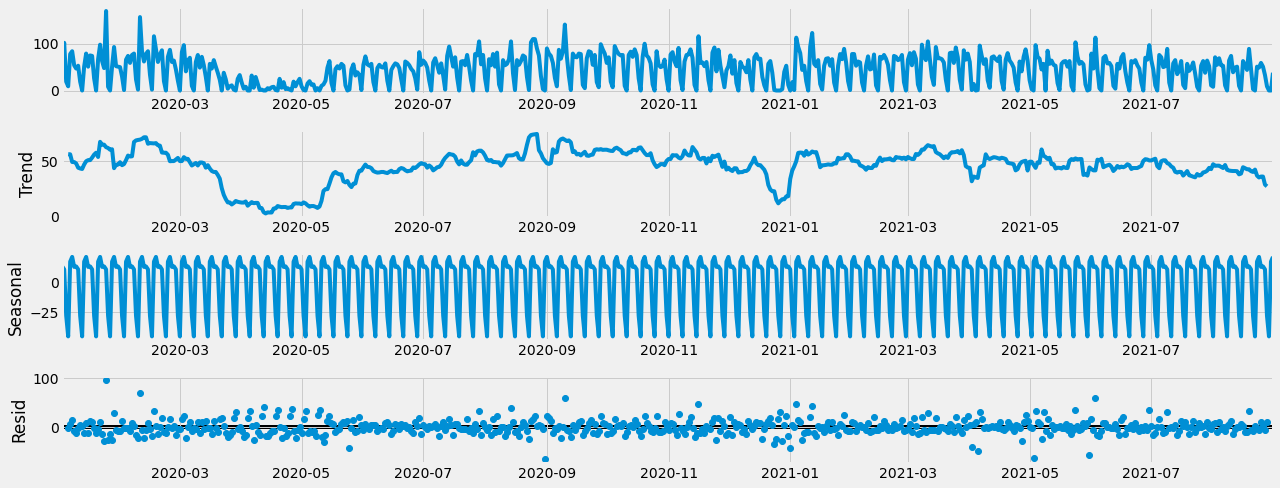

In [35]:
decomposition.plot()
plt.savefig(os.path.join(vizpath,'Time Series - Daily Request Decomposition - 01Jan2020 to 31Aug2021.png'))

#### Observations:
1.	Trend: as an overall picture, the Trend is relatively steady, more so after May 2020,
        - after inital 1st Pandemic lockdown.
2.  Seasonaility: Seasonality is present, which is generally to be expeceted.
3.  Residual: There is a strong existence of noise which is not uncommon for daily data values.

Based on the above decomposition plots, it is clear that the 1st Pandmeic lockdown had a significant effect on daily sign requests.  To assit with helping to stationize the data, the time series will be filtered to exclude the pandemic effect and will include the following dates:
    - 1st June 2020 to 31st August 2021

### convert time series to dataframe and apply date filter

In [83]:
df_request = df_request.reset_index()
df_request.head()

,index,requests_per_day
0,2020-01-02,48
1,2020-01-03,102
2,2020-01-04,19
3,2020-01-05,9
4,2020-01-06,78


In [84]:
df_request.shape

(608, 2)

### check datatypes

In [85]:
df_request.dtypes

index               datetime64[ns]
requests_per_day             int64
dtype: object

### rename 'index' column to 'date'

In [88]:
df_request = df_request.rename(columns={'index':'date'})
df_request.dtypes

date                datetime64[ns]
requests_per_day             int64
dtype: object

### apply date filter

In [89]:
df_request = df_request.loc[df_request['date']>='2020-06-01']
df_request.shape

(457, 2)

### export filtered dataframe to CSV

In [90]:
df_request.to_csv(os.path.join(dataset,'time_series_requests_per_day_from_Jun2020.csv'), index=False)

### convert back to time series by setting index to 'date'

In [93]:
df_request = df_request.set_index(['date'])
df_request.head()

,requests_per_day
date,
2020-06-01,55
2020-06-02,73
2020-06-03,56
2020-06-04,53
2020-06-05,57


In [94]:
df_request.tail()

,requests_per_day
date,
2021-08-27,33
2021-08-28,9
2021-08-29,0
2021-08-30,0
2021-08-31,38


### display as time series plot

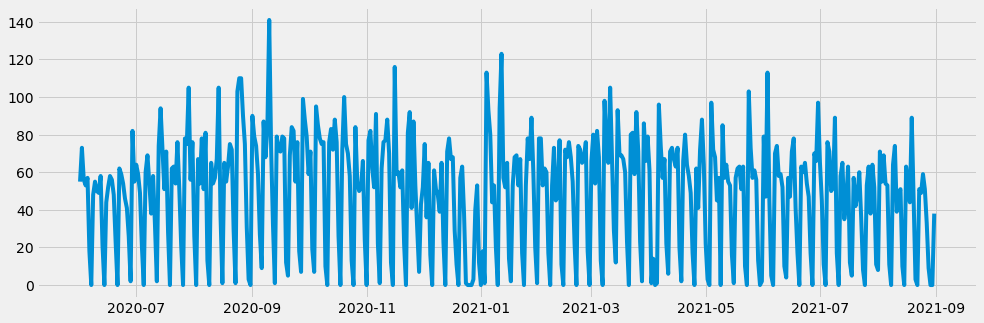

In [96]:
plt.figure(figsize=(15,5))
plt.plot(df_request)

Time series is ready for Stationary testing, autocorrelation checks and if required, differencing.